# Import niezbędnych bibliotek.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import KBinsDiscretizer

# Wczytanie danych.

In [2]:
df = pd.read_csv('df1.csv', index_col=0 )
df_2 = pd.read_csv('df2.csv', index_col=0)
df_3 = pd.read_csv('attrition.csv', index_col=0)
df_4 = pd.read_csv('sample_output.csv', index_col=0)

# Połączenie plików w jeden główny.
Sprawdzamy liczbę kolumn i wierszy.

In [3]:
print(df.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)

(4449, 19)
(4449, 16)
(4449, 1)
(147, 1)


In [4]:
df.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
EmployeeNumber,,,,,,,,,,,,,,,,,,,
104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0


In [5]:
df_2.head(2)

,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
EmployeeNumber,,,,,,,,,,,,,,,,
104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0


In [6]:
df_3.head(2)

,Attrition
EmployeeNumber,
104,No
1638,No


Czwarty dataset dotyczcy pracowników o innych indeksach, zatem nie bierzemy go pod uwagę.

In [7]:
df_4.head(2)

,Attrition
EmployeeNumber,
100000,1
100001,1


Mergujemy dane komendą join, dołączając poszczególne pliki do pierwszego df. Danych df_3 nie dodajemy, gdyż zawierają dane, które już są zawarte w naszym dataframe.

In [8]:
df = df.merge(df_2, left_index=True, right_index=True)

In [9]:
df = df.join(df_4, rsuffix='_sample_output')

In [10]:
df['Attrition_sample_output'] = df['Attrition_sample_output'].replace(1, 'Yes')

In [11]:
df['Attrition'] = np.where(df['Attrition'].isna(), df['Attrition_sample_output'], df['Attrition'])

In [12]:
df.drop(columns='Attrition_sample_output', inplace=True)

Sprawdzamy, czy zgadza się liczba kolumn w pliku.

In [13]:
df.shape

(4449, 35)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 104 to 7979
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4449 non-null   float64
 1   BusinessTravel            4449 non-null   object 
 2   DailyRate                 4449 non-null   float64
 3   Department                4449 non-null   object 
 4   DistanceFromHome          4449 non-null   float64
 5   Education                 4449 non-null   float64
 6   EducationField            4449 non-null   object 
 7   EmployeeCount             4449 non-null   float64
 8   EnvironmentSatisfaction   4449 non-null   float64
 9   Gender                    4449 non-null   object 
 10  HourlyRate                4449 non-null   float64
 11  JobInvolvement            4449 non-null   float64
 12  JobLevel                  4449 non-null   float64
 13  JobRole                   4449 non-null   object 
 14  JobSat

# Sprawdzenie danych.

## Sprawdzenie, czy dane się nie duplikują.

In [15]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'YearlyIncome'],
      dtype='object')

Dane się nie dublikują, w innym przypadku skorzystalibyśmy z komendy df.T.drop_duplicates().T i usuneli zdublikowane kolumny.

In [16]:
df.duplicated(keep=False).sum()

2286

Komendą duplicated(keep=False).sum() sprawdzimiśmy, czy napewno wszystkie powtarzające dane zostały usunięte.

## Sprawdzamy braki w danych.

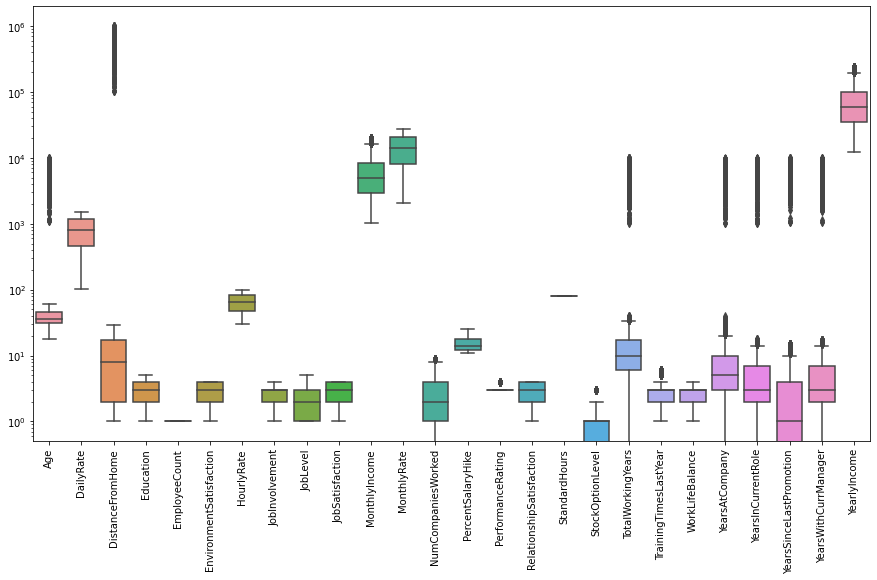

In [17]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=df)

plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 104 to 7979
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4449 non-null   float64
 1   BusinessTravel            4449 non-null   object 
 2   DailyRate                 4449 non-null   float64
 3   Department                4449 non-null   object 
 4   DistanceFromHome          4449 non-null   float64
 5   Education                 4449 non-null   float64
 6   EducationField            4449 non-null   object 
 7   EmployeeCount             4449 non-null   float64
 8   EnvironmentSatisfaction   4449 non-null   float64
 9   Gender                    4449 non-null   object 
 10  HourlyRate                4449 non-null   float64
 11  JobInvolvement            4449 non-null   float64
 12  JobLevel                  4449 non-null   float64
 13  JobRole                   4449 non-null   object 
 14  JobSat

In [19]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition 

In [20]:
df['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df['Age'].unique()

array([  30.,   38.,   26.,   28.,   35.,   34.,   32.,   42.,   40.,
         48.,   39.,   18.,   43.,   21.,   53.,   45.,   29.,   33.,
         41.,   24.,   37.,   50.,   36.,   52.,   47.,   31.,   49.,
         54.,   44.,   22.,   46.,   27.,   55.,   59.,   25.,   23.,
         56.,   20.,   60.,   51.,   58.,   19.,   57., 8825., 3628.,
       6287., 9330., 1107., 4454., 9155., 9890., 1189., 9195., 9014.,
       1136., 5582., 2404., 1541., 4510., 4322., 4988., 8388., 2530.,
       8901., 2852., 2459., 2982., 4973., 8534., 8314., 4130., 4328.,
       7952., 8699., 3147., 8889., 3871., 9531., 8167., 5257., 8136.,
       7390., 2993., 5672., 5933., 5614., 5007., 3095., 9219., 6749.,
       4515., 6715., 1141., 8949., 3636., 4805., 5959., 9384., 8042.,
       1423., 7056., 5116., 2667., 8703., 1126., 9612., 7845., 6998.,
       1788., 6727., 5377., 5565., 4558., 6506., 4591., 7662., 6510.,
       4985., 9581., 2095., 2275., 6399., 4935., 2698., 7617., 9661.,
       4834., 2242.,

In [22]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [23]:
df['DailyRate'].unique()

array([ 852.,  397.,  841., 1117.,  464., 1107., 1018.,  269.,  296.,
        989.,  855., 1181.,  895.,  827.,  977.,  544.,  244.,  995.,
       1343., 1282.,  153.,  280.,  404., 1265.,  252., 1496.,  306.,
        128.,  529.,  553.,  572.,  482.,  471.,  509.,  130.,  506.,
        329.,  367., 1219.,  746., 1322.,  969., 1271., 1158.,  688.,
        319.,  371., 1336.,  107.,  448.,  359.,  625., 1017.,  835.,
       1050.,  523., 1064., 1128.,  928., 1319.,  932.,  809., 1376.,
        253.,  336.,  884., 1385.,  945.,  118., 1231.,  426.,  737.,
       1442.,  853.,  557.,  377.,  616., 1398., 1138.,  531.,  138.,
       1377., 1240., 1400., 1001., 1082., 1171.,  136.,  218.,  452.,
       1397., 1192.,  944.,  408., 1040., 1329., 1416., 1125., 1144.,
        442., 1157.,  438.,  147.,  140.,  240.,  202., 1297.,  486.,
       1146.,  150., 1404., 1206., 1172.,  771., 1167.,  441., 1141.,
        715.,  891.,  282., 1425., 1371.,  170.,  650., 1212.,  638.,
       1255., 1099.,

In [24]:
df['Department'].unique()

array(['Research & Development', 'Human Resources', 'Sales'], dtype=object)

In [25]:
df['DistanceFromHome'].unique()

array([1.00000e+00, 2.00000e+00, 6.00000e+00, 8.00000e+00, 4.00000e+00,
       9.00000e+00, 3.00000e+00, 5.00000e+00, 2.20000e+01, 2.60000e+01,
       1.00000e+01, 1.20000e+01, 7.00000e+00, 2.50000e+01, 2.90000e+01,
       1.80000e+01, 2.40000e+01, 2.80000e+01, 1.60000e+01, 1.90000e+01,
       1.30000e+01, 2.00000e+01, 1.10000e+01, 2.30000e+01, 2.10000e+01,
       1.50000e+01, 1.40000e+01, 1.70000e+01, 2.70000e+01, 3.02984e+05,
       6.29986e+05, 8.87003e+05, 9.18326e+05, 9.97422e+05, 8.52749e+05,
       6.79106e+05, 3.04698e+05, 7.72706e+05, 2.59089e+05, 9.92947e+05,
       2.53620e+05, 8.86117e+05, 8.60358e+05, 5.47308e+05, 1.93929e+05,
       9.63929e+05, 8.09361e+05, 1.40916e+05, 8.25100e+05, 4.18093e+05,
       7.16417e+05, 5.46730e+05, 2.42839e+05, 7.43173e+05, 1.50886e+05,
       9.46786e+05, 6.07220e+05, 5.60047e+05, 8.40183e+05, 5.88585e+05,
       4.79723e+05, 3.02239e+05, 9.99590e+05, 1.35607e+05, 3.27380e+05,
       5.16738e+05, 3.80120e+05, 2.89540e+05, 4.70836e+05, 6.364

In [26]:
df['Education'].unique()

array([1., 2., 3., 4., 5.])

In [27]:
df['EducationField'].unique()

array(['Life Sciences', 'Medical', 'Other', 'Technical Degree',
       'Marketing', 'Human Resources'], dtype=object)

In [28]:
df['EmployeeCount'].unique()

array([1.])

In [29]:
df['EnvironmentSatisfaction'].unique()

array([4., 3., 1., 2.])

In [30]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [31]:
df['HourlyRate'].unique()

array([ 55.,  54.,  46.,  66.,  75.,  52.,  39.,  56.,  33.,  82.,  45.,
        70.,  97.,  77.,  40.,  49.,  58.,  73.,  43.,  98.,  95.,  41.,
       100.,  84.,  79.,  74.,  90.,  96.,  91.,  32.,  88.,  86.,  76.,
        35.,  94.,  83.,  65.,  42.,  31.,  51.,  36.,  80.,  69.,  99.,
        48.,  89.,  81.,  61.,  92.,  59.,  44.,  47.,  53.,  34.,  60.,
        78.,  30.,  68.,  37.,  87.,  50.,  63.,  72.,  38.,  71.,  64.,
        85.,  57.,  67.,  62.,  93.])

In [32]:
df['JobInvolvement'].unique()

array([2., 3., 1., 4.])

In [33]:
df['JobLevel'].unique()

array([2., 3., 1., 5., 4.])

In [34]:
df['JobRole'].unique()

array(['Laboratory Technician', 'Manufacturing Director',
       'Research Scientist', 'Human Resources', 'Research Director',
       'Sales Representative', 'Manager', 'Healthcare Representative',
       'Sales Executive'], dtype=object)

In [35]:
df['JobSatisfaction'].unique()

array([4., 3., 2., 1.])

In [36]:
df['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [37]:
df['MonthlyIncome'].unique()

array([ 5126.,  7756.,  2368., ..., 13348.,  7978.,  3708.])

In [38]:
df['MonthlyRate'].unique()

array([15998., 14199., 23300., ..., 14842., 14075.,  2104.])

In [39]:
df['NumCompaniesWorked'].unique()

array([1., 3., 0., 5., 9., 4., 2., 6., 7., 8.])

In [40]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [41]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [42]:
df['PercentSalaryHike'].unique()

array([12., 19., 21., 15., 11., 16., 14., 13., 18., 23., 22., 17., 20.,
       25., 24.])

In [43]:
df['PerformanceRating'].unique()

array([3., 4.])

In [44]:
df['RelationshipSatisfaction'].unique()

array([3., 4., 2., 1.])

In [45]:
df['StandardHours'].unique()

array([80.])

In [46]:
df['StockOptionLevel'].unique()

array([2., 1., 0., 3.])

In [47]:
df['TotalWorkingYears'].unique()

array([1.000e+01, 5.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 2.100e+01,
       1.100e+01, 1.900e+01, 0.000e+00, 6.000e+00, 2.600e+01, 9.000e+00,
       1.400e+01, 1.700e+01, 2.500e+01, 1.200e+01, 1.300e+01, 7.000e+00,
       8.000e+00, 1.800e+01, 2.800e+01, 1.500e+01, 2.000e+01, 2.300e+01,
       2.400e+01, 1.600e+01, 3.700e+01, 2.200e+01, 4.000e+00, 3.000e+01,
       3.200e+01, 3.100e+01, 2.700e+01, 2.900e+01, 3.500e+01, 3.800e+01,
       3.400e+01, 4.000e+01, 3.600e+01, 3.300e+01, 6.618e+03, 3.808e+03,
       2.764e+03, 4.370e+03, 1.086e+03, 5.377e+03, 8.821e+03, 9.536e+03,
       1.822e+03, 4.740e+03, 3.625e+03, 8.183e+03, 8.890e+03, 9.670e+03,
       9.815e+03, 4.506e+03, 1.442e+03, 4.031e+03, 4.196e+03, 2.450e+03,
       6.907e+03, 8.095e+03, 4.409e+03, 5.482e+03, 9.714e+03, 8.746e+03,
       7.825e+03, 6.463e+03, 1.123e+03, 2.194e+03, 4.607e+03, 7.635e+03,
       9.501e+03, 8.270e+03, 5.787e+03, 4.958e+03, 3.077e+03, 8.575e+03,
       2.270e+03, 4.176e+03, 1.143e+03, 5.257e+03, 

In [48]:
df['TrainingTimesLastYear'].unique()

array([1., 6., 3., 0., 4., 2., 5.])

In [49]:
df['WorkLifeBalance'].unique()

array([2., 4., 3., 1.])

In [50]:
df['YearsAtCompany'].unique()

array([1.000e+01, 5.000e+00, 1.000e+00, 2.000e+00, 7.000e+00, 9.000e+00,
       2.000e+01, 0.000e+00, 3.000e+00, 1.400e+01, 8.000e+00, 2.400e+01,
       6.000e+00, 4.000e+00, 1.100e+01, 1.500e+01, 1.300e+01, 2.100e+01,
       3.600e+01, 2.600e+01, 1.900e+01, 1.600e+01, 2.200e+01, 1.800e+01,
       2.500e+01, 1.700e+01, 1.200e+01, 3.700e+01, 3.300e+01, 4.000e+01,
       3.400e+01, 2.300e+01, 2.900e+01, 3.100e+01, 3.200e+01, 2.700e+01,
       3.000e+01, 5.078e+03, 7.345e+03, 3.079e+03, 2.332e+03, 1.761e+03,
       1.378e+03, 8.870e+03, 4.879e+03, 9.445e+03, 2.265e+03, 5.801e+03,
       8.553e+03, 3.761e+03, 2.051e+03, 7.735e+03, 2.506e+03, 9.066e+03,
       3.335e+03, 1.621e+03, 8.120e+03, 3.743e+03, 9.681e+03, 6.797e+03,
       3.707e+03, 7.547e+03, 6.133e+03, 3.177e+03, 3.549e+03, 8.717e+03,
       1.036e+03, 9.508e+03, 1.488e+03, 5.359e+03, 2.744e+03, 5.581e+03,
       9.676e+03, 1.286e+03, 5.904e+03, 1.872e+03, 4.763e+03, 7.324e+03,
       6.140e+03, 3.687e+03, 1.420e+03, 9.767e+03, 

In [51]:
df['YearsInCurrentRole'].unique()

array([8.000e+00, 4.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 7.000e+00,
       6.000e+00, 9.000e+00, 5.000e+00, 1.300e+01, 1.100e+01, 1.000e+00,
       1.000e+01, 1.700e+01, 1.200e+01, 1.500e+01, 1.400e+01, 1.600e+01,
       1.800e+01, 3.099e+03, 3.591e+03, 6.908e+03, 1.099e+03, 3.814e+03,
       6.651e+03, 4.218e+03, 1.179e+03, 4.230e+03, 9.454e+03, 5.438e+03,
       2.975e+03, 4.252e+03, 2.939e+03, 9.459e+03, 9.420e+03, 4.139e+03,
       8.200e+03, 2.100e+03, 4.858e+03, 6.364e+03, 8.251e+03, 4.925e+03,
       3.723e+03, 4.194e+03, 4.323e+03, 4.558e+03, 1.858e+03, 7.125e+03,
       4.435e+03, 8.935e+03, 4.986e+03, 9.107e+03, 7.137e+03, 4.656e+03,
       2.515e+03, 7.635e+03, 4.461e+03, 7.908e+03, 5.735e+03, 8.835e+03,
       1.797e+03, 4.137e+03, 9.193e+03, 6.691e+03, 9.596e+03, 7.077e+03,
       1.191e+03, 4.174e+03, 4.713e+03, 3.606e+03, 5.335e+03, 9.822e+03,
       7.420e+03, 2.816e+03, 7.866e+03, 3.509e+03, 2.360e+03, 2.514e+03,
       4.376e+03, 7.320e+03, 3.443e+03, 3.453e+03, 

In [52]:
df['YearsSinceLastPromotion'].unique()

array([3.000e+00, 0.000e+00, 4.000e+00, 2.000e+00, 7.000e+00, 1.000e+00,
       9.000e+00, 8.000e+00, 5.000e+00, 1.100e+01, 6.000e+00, 1.500e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.000e+01, 8.080e+03, 3.720e+03,
       7.291e+03, 6.920e+03, 8.467e+03, 9.420e+03, 3.246e+03, 8.913e+03,
       9.952e+03, 8.550e+03, 7.997e+03, 8.534e+03, 6.773e+03, 4.940e+03,
       1.973e+03, 6.763e+03, 8.021e+03, 5.738e+03, 5.291e+03, 1.094e+03,
       3.771e+03, 4.958e+03, 8.890e+03, 8.538e+03, 3.982e+03, 2.153e+03,
       6.279e+03, 7.240e+03, 4.204e+03, 5.392e+03, 3.486e+03, 3.742e+03,
       6.401e+03, 2.166e+03, 8.312e+03, 5.994e+03, 5.894e+03, 2.293e+03,
       6.747e+03, 7.989e+03, 4.200e+03, 2.754e+03, 8.922e+03, 4.370e+03,
       9.389e+03, 4.704e+03, 1.201e+03, 3.777e+03, 1.815e+03, 4.382e+03,
       2.576e+03, 2.475e+03, 6.551e+03, 9.509e+03, 5.284e+03, 5.292e+03,
       9.990e+03, 6.003e+03, 4.575e+03, 5.649e+03, 2.081e+03, 7.609e+03,
       9.572e+03, 5.308e+03, 5.383e+03, 1.058e+03, 

In [53]:
df['YearsWithCurrManager'].unique()

array([0.000e+00, 2.000e+00, 3.000e+00, 7.000e+00, 8.000e+00, 9.000e+00,
       6.000e+00, 1.100e+01, 4.000e+00, 1.200e+01, 5.000e+00, 1.000e+01,
       1.700e+01, 1.000e+00, 1.300e+01, 1.400e+01, 1.600e+01, 1.500e+01,
       1.798e+03, 9.404e+03, 4.163e+03, 2.411e+03, 1.947e+03, 5.987e+03,
       9.201e+03, 5.346e+03, 2.106e+03, 8.731e+03, 1.759e+03, 2.736e+03,
       2.181e+03, 7.012e+03, 6.277e+03, 7.405e+03, 2.101e+03, 3.908e+03,
       1.781e+03, 2.883e+03, 4.389e+03, 7.032e+03, 2.811e+03, 5.256e+03,
       6.162e+03, 5.242e+03, 3.922e+03, 5.168e+03, 8.672e+03, 9.717e+03,
       6.129e+03, 5.048e+03, 3.434e+03, 2.879e+03, 9.333e+03, 2.892e+03,
       4.528e+03, 7.876e+03, 2.702e+03, 6.788e+03, 1.077e+03, 2.428e+03,
       5.233e+03, 8.457e+03, 9.709e+03, 3.546e+03, 9.321e+03, 5.326e+03,
       2.333e+03, 9.882e+03, 2.564e+03, 1.910e+03, 4.869e+03, 2.480e+03,
       8.393e+03, 4.404e+03, 6.426e+03, 8.841e+03, 7.091e+03, 4.220e+03,
       1.540e+03, 6.691e+03, 7.781e+03, 4.321e+03, 

In [54]:
df['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [55]:
df['YearlyIncome'].unique()

array([ 61512.,  93072.,  28416., ..., 160176.,  95736.,  44496.])

## Usuwanie absurdalnych wartości odstajacych.

Usuwanie wartości odstających dla wieku.

In [56]:
df['Age'] = df['Age'].apply(lambda x: np.nan if float(x)>100 else float(x))

In [57]:
df['Age'].unique()

array([30., 38., 26., 28., 35., 34., 32., 42., 40., 48., 39., 18., 43.,
       21., 53., 45., 29., 33., 41., 24., 37., 50., 36., 52., 47., 31.,
       49., 54., 44., 22., 46., 27., 55., 59., 25., 23., 56., 20., 60.,
       51., 58., 19., 57., nan])

In [58]:
df['Age'] = df['Age'].replace(np.nan, df['Age'].median())

Usuwanie wartości odstających dla DistanceFromHome

In [59]:
df['DistanceFromHome'] = df['DistanceFromHome'].apply(lambda x: np.nan if float(x)>100 else float(x))

In [60]:
df['DistanceFromHome'].unique()

array([ 1.,  2.,  6.,  8.,  4.,  9.,  3.,  5., 22., 26., 10., 12.,  7.,
       25., 29., 18., 24., 28., 16., 19., 13., 20., 11., 23., 21., 15.,
       14., 17., 27., nan])

In [61]:
df['DistanceFromHome'] = df['DistanceFromHome'].replace(np.nan, df['DistanceFromHome'].median())

Usuwanie wartości odstających dla TotalWorkingYears

In [62]:
df['TotalWorkingYears'] = df['TotalWorkingYears'].apply(lambda x: np.nan if float(x)>100 else float(x))

In [63]:
df['TotalWorkingYears'].unique()

array([10.,  5.,  1.,  2.,  3., 21., 11., 19.,  0.,  6., 26.,  9., 14.,
       17., 25., 12., 13.,  7.,  8., 18., 28., 15., 20., 23., 24., 16.,
       37., 22.,  4., 30., 32., 31., 27., 29., 35., 38., 34., 40., 36.,
       33., nan])

In [64]:
df['TotalWorkingYears'] = df['TotalWorkingYears'].replace(np.nan, df['TotalWorkingYears'].median())

Usuwanie wartości odstających dla YearsAtCompany

In [65]:
df['YearsAtCompany'] = df['YearsAtCompany'].apply(lambda x: np.nan if float(x)>80 else float(x))

In [66]:
df['YearsAtCompany'].unique()

array([10.,  5.,  1.,  2.,  7.,  9., 20.,  0.,  3., 14.,  8., 24.,  6.,
        4., 11., 15., 13., 21., 36., 26., 19., 16., 22., 18., 25., 17.,
       12., 37., 33., 40., 34., 23., 29., 31., 32., 27., 30., nan])

In [67]:
df['YearsAtCompany'] = df['YearsAtCompany'].replace(np.nan, df['YearsAtCompany'].median())

Usuwanie wartości odstających YearsInCurrebtRole

In [68]:
df['YearsInCurrentRole'] = df['YearsInCurrentRole'].apply(lambda x: np.nan if float(x)>80 else float(x))

In [69]:
df['YearsInCurrentRole'].unique()

array([ 8.,  4.,  3.,  0.,  2.,  7.,  6.,  9.,  5., 13., 11.,  1., 10.,
       17., 12., 15., 14., 16., 18., nan])

In [70]:
df['YearsInCurrentRole'] = df['YearsInCurrentRole'].replace(np.nan, df['YearsInCurrentRole'].median())

Usuwanie wartości odstających dla YearsSinceLastPromotion

In [71]:
df['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].apply(lambda x: np.nan if float(x)>80 else float(x))

In [72]:
df['YearsSinceLastPromotion'].unique()

array([ 3.,  0.,  4.,  2.,  7.,  1.,  9.,  8.,  5., 11.,  6., 15., 12.,
       13., 14., 10., nan])

In [73]:
df['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].replace(np.nan, df['YearsSinceLastPromotion'].median())

Usuwanie wartości odstających dla YearsWithCurrentManager

In [74]:
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].apply(lambda x: np.nan if float(x)>80 else float(x))

In [75]:
df['YearsWithCurrManager'].unique()

array([ 0.,  2.,  3.,  7.,  8.,  9.,  6., 11.,  4., 12.,  5., 10., 17.,
        1., 13., 14., 16., 15., nan])

In [76]:
df['YearsWithCurrManager'] = df['YearsWithCurrManager'].replace(np.nan, df['YearsWithCurrManager'].median())

Sprawdzamy jak teraz rozkładają się wartości odstajace za pomocą boxplota.

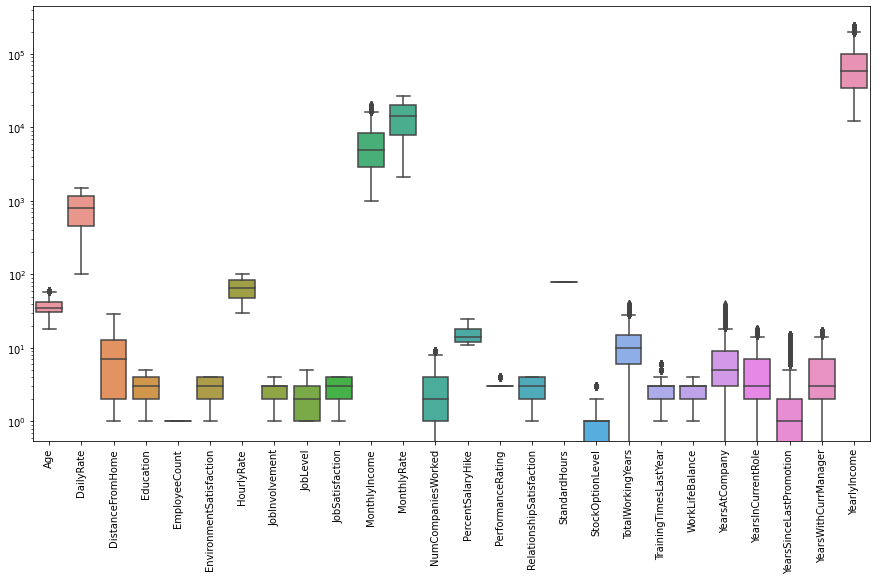

In [77]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=df)

plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

## Usuwanie zbędnych kolumn z jedną wartością.

In [78]:
df = df.drop(['EmployeeCount'], axis=1)
df = df.drop(['Over18'], axis=1)
df = df.drop(['StandardHours'], axis=1)

## Zmiana typów danych

In [79]:
df[df.select_dtypes(['object']).columns] = df[df.select_dtypes(['object']).columns].apply(lambda x: x.astype('category'))

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 104 to 7979
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       4449 non-null   float64 
 1   BusinessTravel            4449 non-null   category
 2   DailyRate                 4449 non-null   float64 
 3   Department                4449 non-null   category
 4   DistanceFromHome          4449 non-null   float64 
 5   Education                 4449 non-null   float64 
 6   EducationField            4449 non-null   category
 7   EnvironmentSatisfaction   4449 non-null   float64 
 8   Gender                    4449 non-null   category
 9   HourlyRate                4449 non-null   float64 
 10  JobInvolvement            4449 non-null   float64 
 11  JobLevel                  4449 non-null   float64 
 12  JobRole                   4449 non-null   category
 13  JobSatisfaction           4449 non-null   floa

# Sprawdzamy korelację zmiennych.

In [81]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\nowy\AppData\Local\Temp\ipykernel_37956\2001914525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
Age,1.00,0.01,-0.02,0.20,0.01,0.03,0.03,0.49,-0.00,0.48,0.02,0.29,0.00,-0.00,0.07,0.04,0.64,-0.03,-0.01,0.30,0.20,0.22,0.19,0.48
DailyRate,0.01,1.00,0.00,-0.01,0.02,0.04,0.04,0.01,0.03,0.02,-0.04,0.05,0.03,0.01,0.01,0.04,0.02,0.00,-0.04,-0.02,0.00,-0.01,-0.01,0.02
DistanceFromHome,-0.02,0.00,1.00,0.02,-0.02,0.02,0.01,0.01,-0.01,-0.02,0.02,-0.03,0.03,0.02,0.01,0.04,0.01,-0.05,-0.02,-0.00,0.03,0.00,0.01,-0.02
Education,0.20,-0.01,0.02,1.00,-0.03,0.02,0.06,0.10,-0.02,0.10,-0.04,0.13,-0.01,-0.03,0.00,0.02,0.15,-0.03,0.00,0.06,0.05,0.05,0.07,0.10
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,1.00,-0.06,-0.01,-0.00,0.00,-0.01,0.04,0.02,-0.03,-0.02,0.01,-0.00,-0.02,-0.02,0.03,-0.01,0.02,0.02,0.00,-0.01
HourlyRate,0.03,0.04,0.02,0.02,-0.06,1.00,0.04,-0.03,-0.07,-0.02,-0.01,0.01,-0.01,-0.01,0.00,0.04,-0.01,-0.00,-0.00,-0.03,-0.03,-0.03,-0.03,-0.02
JobInvolvement,0.03,0.04,0.01,0.06,-0.01,0.04,1.00,-0.01,-0.03,-0.01,0.00,0.01,-0.02,-0.03,0.04,0.02,-0.00,-0.02,-0.01,-0.00,0.01,-0.02,0.04,-0.01
JobLevel,0.49,0.01,0.01,0.10,-0.00,-0.03,-0.01,1.00,-0.01,0.95,0.04,0.15,-0.04,-0.03,0.03,0.01,0.77,-0.03,0.05,0.52,0.37,0.34,0.36,0.95
JobSatisfaction,-0.00,0.03,-0.01,-0.02,0.00,-0.07,-0.03,-0.01,1.00,-0.01,0.01,-0.06,0.02,0.01,0.00,0.02,-0.03,-0.00,-0.01,-0.02,-0.01,-0.02,-0.04,-0.01
MonthlyIncome,0.48,0.02,-0.02,0.10,-0.01,-0.02,-0.01,0.95,-0.01,1.00,0.04,0.16,-0.03,-0.02,0.03,0.00,0.76,-0.03,0.04,0.50,0.35,0.34,0.33,1.00


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
Age,1.000000,0.012825,-0.015358,0.204716,0.014426,0.025127,0.030833,0.490176,-0.004742,0.481600,...,0.068679,0.039868,0.644000,-0.033267,-0.012064,0.301936,0.201455,0.219634,0.193534,0.481600
DailyRate,0.012825,1.000000,0.000003,-0.006985,0.023780,0.040703,0.043028,0.006980,0.029500,0.015991,...,0.013945,0.038879,0.017018,0.002176,-0.038489,-0.021440,0.004338,-0.009567,-0.012899,0.015991
DistanceFromHome,-0.015358,0.000003,1.000000,0.017055,-0.021737,0.021032,0.010720,0.009455,-0.010986,-0.020412,...,0.013246,0.038656,0.006084,-0.049145,-0.016752,-0.000699,0.030726,0.002752,0.010090,-0.020412
Education,0.204716,-0.006985,0.017055,1.000000,-0.034617,0.017561,0.059247,0.104074,-0.016301,0.097421,...,0.002830,0.023817,0.147412,-0.026296,0.001682,0.060796,0.045339,0.048665,0.066848,0.097421
EnvironmentSatisfaction,0.014426,0.023780,-0.021737,-0.034617,1.000000,-0.057194,-0.011073,-0.002458,0.003041,-0.012980,...,0.012029,-0.002071,-0.015233,-0.021827,0.031968,-0.014098,0.022084,0.015747,0.000991,-0.012980
HourlyRate,0.025127,0.040703,0.021032,0.017561,-0.057194,1.000000,0.038947,-0.032072,-0.069440,-0.018453,...,0.001734,0.041904,-0.011846,-0.004673,-0.003947,-0.032681,-0.034407,-0.029755,-0.029254,-0.018453
JobInvolvement,0.030833,0.043028,0.010720,0.059247,-0.011073,0.038947,1.000000,-0.012870,-0.029586,-0.013128,...,0.040840,0.015526,-0.003034,-0.023050,-0.009441,-0.003840,0.009494,-0.019227,0.041532,-0.013128
JobLevel,0.490176,0.006980,0.009455,0.104074,-0.002458,-0.032072,-0.012870,1.000000,-0.006538,0.950543,...,0.029103,0.008408,0.765225,-0.030515,0.046485,0.519729,0.374254,0.341029,0.360242,0.950543
JobSatisfaction,-0.004742,0.029500,-0.010986,-0.016301,0.003041,-0.069440,-0.029586,-0.006538,1.000000,-0.013685,...,0.004335,0.024372,-0.029716,-0.002930,-0.012736,-0.023233,-0.008025,-0.021544,-0.036631,-0.013685
MonthlyIncome,0.481600,0.015991,-0.020412,0.097421,-0.012980,-0.018453,-0.013128,0.950543,-0.013685,1.000000,...,0.034326,0.001211,0.759721,-0.033840,0.039486,0.499848,0.348442,0.336606,0.330130,1.000000


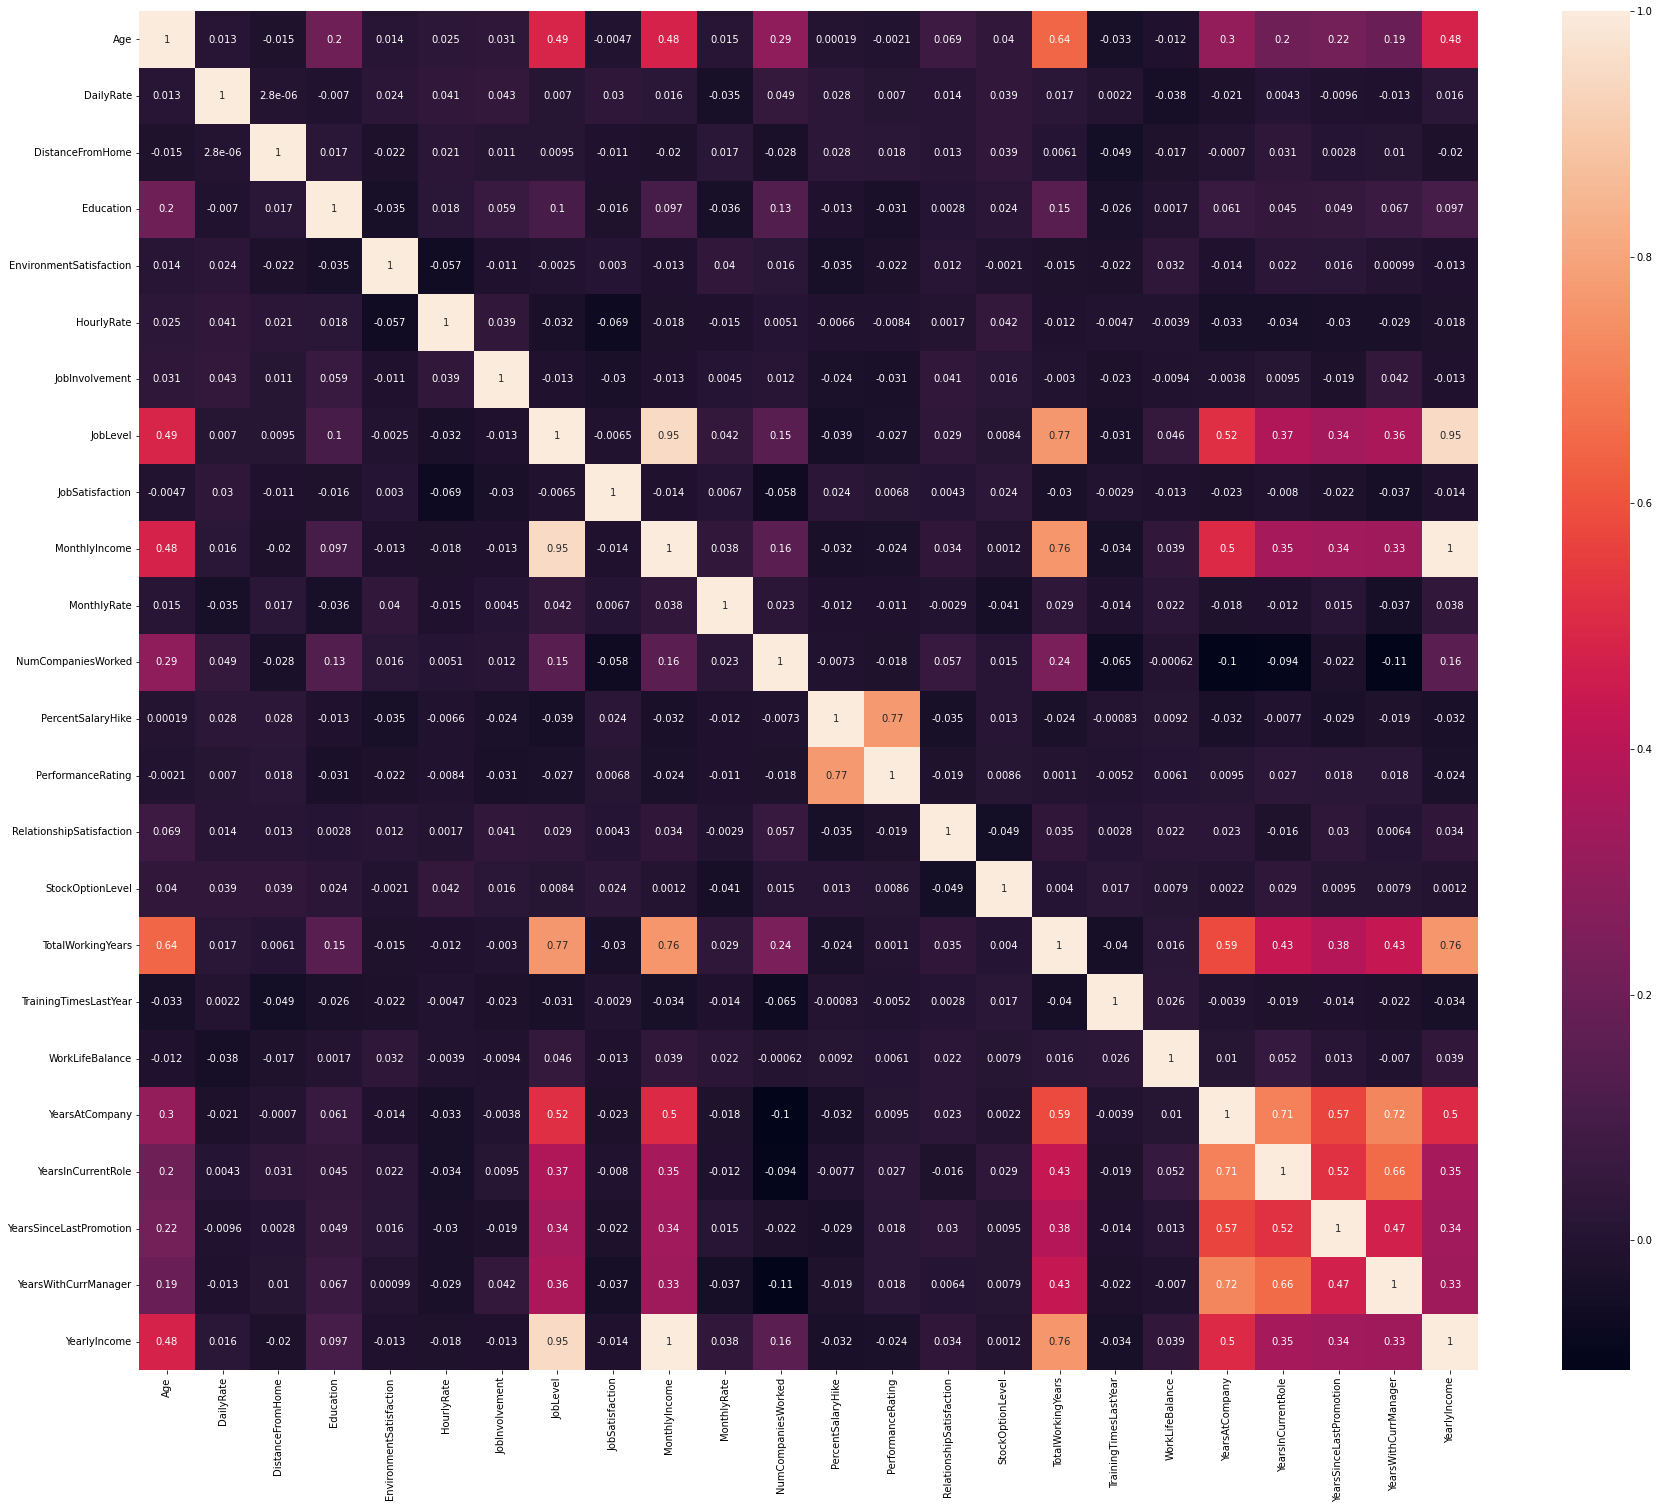

In [82]:
corr = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr, annot=True)
corr.loc[(corr>0.7).any(axis=1)]

In [83]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
corr_70 = corr.stack()[corr.stack().abs()>0.7]
corr_70

MonthlyIncome         JobLevel             0.950543
PerformanceRating     PercentSalaryHike    0.769468
TotalWorkingYears     JobLevel             0.765225
                      MonthlyIncome        0.759721
YearsInCurrentRole    YearsAtCompany       0.707517
YearsWithCurrManager  YearsAtCompany       0.721984
YearlyIncome          JobLevel             0.950543
                      MonthlyIncome        1.000000
                      TotalWorkingYears    0.759721
dtype: float64

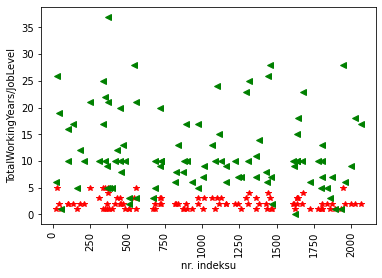

In [84]:
n = 100
fig, ax = plt.subplots()

ax.plot(df.index[:n], df['JobLevel'][:n], c='r', linestyle='None', marker='*')
ax.plot(df.index[:n], df['TotalWorkingYears'][:n], c='g',  linestyle='None', marker='<')
ax.xaxis.set_tick_params(rotation=90)

#pierwszy sposób
ax.set_xlabel('nr. indeksu')
ax.set_ylabel('TotalWorkingYears/JobLevel')

plt.show()

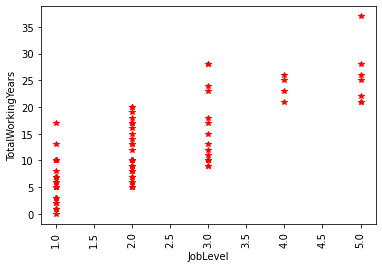

In [85]:
n = 100
fig, ax = plt.subplots()

ax.plot(df['JobLevel'][:n], df['TotalWorkingYears'][:n],c='r', linestyle='None', marker='*')
ax.xaxis.set_tick_params(rotation=90)

#pierwszy sposób
ax.set_xlabel('JobLevel')
ax.set_ylabel('TotalWorkingYears')

plt.show()

# Dumies trap

In [86]:
categorical_columns_ls = df.select_dtypes(
    ["object", "category"]
).columns.to_list()

df_encoded = pd.get_dummies(
    data=df,
#     prefixsep="",
    columns=categorical_columns_ls,
    drop_first=True,
    dtype="int8",
)

In [87]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 104 to 7979
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4449 non-null   float64
 1   DailyRate                          4449 non-null   float64
 2   DistanceFromHome                   4449 non-null   float64
 3   Education                          4449 non-null   float64
 4   EnvironmentSatisfaction            4449 non-null   float64
 5   HourlyRate                         4449 non-null   float64
 6   JobInvolvement                     4449 non-null   float64
 7   JobLevel                           4449 non-null   float64
 8   JobSatisfaction                    4449 non-null   float64
 9   MonthlyIncome                      4449 non-null   float64
 10  MonthlyRate                        4449 non-null   float64
 11  NumCompaniesWorked                 4449 non-null   flo

# Dzielimy dane na zbiór testowy i treningowy

In [88]:
X = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (3559, 45)
X_test dimension=  (890, 45)
y_train dimension=  (3559,)
y_test dimension=  (890,)


# Budowa modeli

Standaryzujemy cechy

In [89]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

K najbliższych sąsiadów

## Klasyfikator realizujący głosowanie k-najbliższych sąsiadów.

In [90]:
# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)

In [91]:
# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='weighted'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [92]:
print_results(calculate_metrics(y_test, pred), 'kNN')

Results for kNN
----
  Accuracy:  0.5134831460674157
  Precision: 0.5113025291436782
  Recall:    0.5134831460674157
  F1 score:  0.5121096932454442
  Mislabeled 433 out of 890




## Dyskretyzacja

In [93]:
discretizer = KBinsDiscretizer(n_bins=2)
X_train_dis = discretizer.fit_transform(X_train)
X_test_dis = discretizer.transform(X_test)

D:\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 13 are removed. Consider decreasing the number of bins.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 24 are removed. Consider decreasing the number of bins.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 25 are removed. Consider decreasing the number of bins.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 26 are removed. Consider decreasing the number of bins.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\preprocessing\_discretization.py:230: UserWarning: Bins whose width are too small 

In [94]:
knn_classifier = KNeighborsClassifier()

parameters = {
    'n_neighbors': [1, 3, 5, 7, 15, 51, 101],
    'weights':['uniform', 'distance'],
    'p': [0.5, 1, 2, 3]
}

searcher = GridSearchCV(knn_classifier, parameters, scoring='roc_auc', n_jobs=-1)
searcher.fit(X_train_dis, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV rox auc", searcher.best_score_)

print("Test roc auc of best grid search hypers:", searcher.score(X_test_dis, y_test))

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "D:\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "D:\anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 395, in _check_algori

Best CV params {'n_neighbors': 51, 'p': 1, 'weights': 'uniform'}
Best CV rox auc 0.510280476990145
Test roc auc of best grid search hypers: 0.5075409785948305


In [95]:
knn_classifier = KNeighborsClassifier()

parameters = {
    'n_neighbors': [11, 51, 71, 81, 101, 111, 135],
    'weights':['uniform', 'distance'],
    'p': [1, 2, 3, 4, 5]
    'metric': ['minkowski', 'chebyshev', 'manhattan']
}

searcher = GridSearchCV(knn_classifier, parameters, scoring='roc_auc', n_jobs=-1)
searcher.fit(X_train, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV rox auc", searcher.best_score_)

print("Test roc auc of best grid search hypers:", searcher.score(X_test, y_test))

SyntaxError: invalid syntax (3055351529.py, line 7)